<a href="https://colab.research.google.com/github/laussin86/KPMG-Virtual-Internship-data-analysis-project/blob/main/KPMG_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KPMG VIRTUAL INTERNSHIP PROJECT
## TASK: 1 - Data Quality Assessment
### Assessment of data quality and completeness in preparation for analysis.
**The client provided KPMG with 3 datasets:**

**1.Customer Demographic**

**2.Customer Addresses**

**3.Transactions data in the past 3 months**


In [1]:
#importing the libraries
import pandas as pd
from google.colab import drive

##Reading the data


In [2]:

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/KPMG/KPMG_VI_New_raw_data_update_final.xlsx'
data = pd.ExcelFile(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Reading each file separately


In [3]:
Transactions = pd.read_excel(data, 'Transactions')
NewCustomerList = pd.read_excel(data, 'NewCustomerList')
CustomerDemographic = pd.read_excel(data, 'CustomerDemographic')
CustomerAddress = pd.read_excel(data, 'CustomerAddress')

<ipython-input-3-7e31c9dbc7f2>:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  NewCustomerList = pd.read_excel(data, 'NewCustomerList')
<ipython-input-3-7e31c9dbc7f2>:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CustomerDemographic = pd.read_excel(data, 'CustomerDemographic')


##Exploring Transactions Data Set


In [4]:
Transactions.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [6]:
#Checking the shape of the data
Transactions.shape


(20000, 13)

In [7]:
#Checking for null values
Transactions.isnull().sum()


transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

There are missing values in 7 columns. They will be dropped or treated according to the nature of our analysis

In [8]:
#Checking for duplicate values
Transactions.duplicated().sum()

0

There is no duplicate in the transaction table

In [9]:
#check for uniqueness of each column
Transactions.nunique() 

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

##Exploring the columns

In [10]:
Transactions['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [11]:
Transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [12]:
Transactions['product_line'].value_counts()


Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [13]:
Transactions['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [14]:
Transactions['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [15]:
Transactions['product_first_sold_date']

0        41245.0
1        41701.0
2        36361.0
3        36145.0
4        42226.0
          ...   
19995    37823.0
19996    35560.0
19997    40410.0
19998    38216.0
19999    36334.0
Name: product_first_sold_date, Length: 20000, dtype: float64

product_first_sold_date is not in the right format so we will convert to the right format

In [17]:
#convert date column from integer to datetime
Transactions['product_first_sold_date'] = pd.to_datetime(Transactions['product_first_sold_date'], unit='s')
Transactions['product_first_sold_date'].head(20)

0    1970-01-01 11:27:25
1    1970-01-01 11:35:01
2    1970-01-01 10:06:01
3    1970-01-01 10:02:25
4    1970-01-01 11:43:46
5    1970-01-01 10:50:31
6    1970-01-01 09:29:25
7    1970-01-01 11:05:15
8    1970-01-01 09:17:35
9    1970-01-01 10:36:56
10   1970-01-01 11:19:44
11   1970-01-01 11:42:52
12   1970-01-01 09:35:27
13   1970-01-01 09:36:26
14   1970-01-01 10:36:33
15   1970-01-01 10:31:13
16   1970-01-01 10:36:46
17   1970-01-01 09:24:48
18   1970-01-01 11:05:15
19   1970-01-01 10:22:17
Name: product_first_sold_date, dtype: datetime64[ns]

We can notice that column is not correct as showing everything was sold the same day at different time.

##Exploring New Customer List Data Set


In [4]:
NewCustomerList.head(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.06,1.3250,1.65625,1.407812,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.94,0.9400,1.17500,0.998750,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.78,0.7800,0.78000,0.780000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.93,1.1625,1.16250,1.162500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.46,0.4600,0.57500,0.575000,4,4,1.703125


In [5]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [6]:
#Dropping the unnamed columns
NewCustomerList.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

In [7]:
#Checking the shape of the dataset
NewCustomerList.shape

(1000, 18)

In [8]:
#Checking for null values
NewCustomerList.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

There are missing values in 4 columns. They will be dropped or treated according to the nature of our analysis

In [9]:
#Checking for duplicate values
NewCustomerList.duplicated().sum()

0

No duplicate

In [10]:
#Checking for uniquess of each column
NewCustomerList.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Rank                                    324
Value                                   324
dtype: int64

###Exploring the columns


In [11]:
NewCustomerList['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

There are 17 columns with unknown/unspecified gender.

In [12]:
NewCustomerList['DOB'].value_counts()

1998-02-05    2
1978-01-15    2
1977-11-08    2
1951-11-28    2
1979-07-28    2
             ..
1945-08-08    1
1943-08-27    1
1999-10-24    1
1976-01-24    1
1955-10-02    1
Name: DOB, Length: 958, dtype: int64

In [13]:
NewCustomerList['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [14]:
NewCustomerList['wealth_segment'].value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

In [15]:
NewCustomerList['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [16]:
NewCustomerList['owns_car'].value_counts()

No     507
Yes    493
Name: owns_car, dtype: int64

In [17]:
NewCustomerList['deceased_indicator'].value_counts()

N    1000
Name: deceased_indicator, dtype: int64

##Exploring Customer Demographic Data Set

In [18]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [19]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [20]:
#Checking for null values
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

There are missing values in 6 columns. They will be dropped or treated according to the nature of our analysis

In [21]:
#Checking for duplicate data
CustomerDemographic.duplicated().sum()

0

No duplicates

In [22]:
#Checking for uniqueness of each column
CustomerDemographic.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

###Exploring the columns

In [23]:
CustomerDemographic['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

Certain categories are not correctly titled.



In [24]:
#Re-naming the categories
CustomerDemographic['gender'] = CustomerDemographic['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified')

In [25]:
CustomerDemographic['gender'].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

In [26]:
CustomerDemographic['past_3_years_bike_related_purchases'].value_counts()

16    56
19    56
67    54
20    54
2     50
      ..
8     28
95    27
85    27
86    27
92    24
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64

In [27]:
CustomerDemographic['DOB'].value_counts()

1978-01-30    7
1964-07-08    4
1962-12-17    4
1978-08-19    4
1977-05-13    4
             ..
1989-06-16    1
1998-09-30    1
1985-03-11    1
1989-10-23    1
1991-11-05    1
Name: DOB, Length: 3448, dtype: int64

In [33]:
print(CustomerDemographic['DOB'].min())

print(CustomerDemographic['DOB'].max())

1843-12-21 00:00:00
2002-03-11 00:00:00


We can notice that the min give us a customer who has 180 years. That looks like a error. 

In [34]:
CustomerDemographic['job_title'].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [35]:
CustomerDemographic['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [36]:
CustomerDemographic['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [37]:
CustomerDemographic['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [38]:
CustomerDemographic['default'].value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64


The values are inconsistent, hence dropping the column

In [39]:
CustomerDemographic = CustomerDemographic.drop('default', axis=1)

In [40]:
CustomerDemographic.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [41]:
CustomerDemographic['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [42]:
CustomerDemographic['tenure'].value_counts()

7.0     235
5.0     228
11.0    221
10.0    218
16.0    215
8.0     211
18.0    208
12.0    202
9.0     200
14.0    200
6.0     192
13.0    191
4.0     191
17.0    182
15.0    179
1.0     166
3.0     160
19.0    159
2.0     150
20.0     96
22.0     55
21.0     54
Name: tenure, dtype: int64

##Exploring Customer Address Data Set


In [43]:
CustomerAddress.head(5)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [44]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [45]:
#Checking for null values.
CustomerAddress.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

No null values

In [46]:
#Checking for duplicate values
CustomerAddress.duplicated().sum()

0

No duplicates

In [47]:
#Checking for uniqueness of each column
CustomerAddress.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64


###Exploring the columns


In [48]:
CustomerAddress['postcode'].value_counts()

2170    31
2155    30
2145    30
2153    29
3977    26
        ..
3808     1
3114     1
4721     1
4799     1
3089     1
Name: postcode, Length: 873, dtype: int64

In [49]:
CustomerAddress['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

Certain categories are not correctly titled.

In [50]:
#Re-naming the categories
CustomerAddress['state'] = CustomerAddress['state'].replace('New South Wales','NSW').replace('Victoria','VIC')

In [51]:
CustomerAddress['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [52]:
CustomerAddress['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In [53]:
CustomerAddress['property_valuation'].value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

## TASK: 1 - Data Insights
# Targeting high value customers based on customer demographics and attributes.

In [127]:
import datetime
##new customer per age categories
# Calculate the person's age in years
# Define a function to calculate age from a date of birth
def calculate_age(dob):
    today = datetime.date.today()
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age
# Apply the calculate_age function to the DOB column to create a new column for age
NewCustomerList['Age'] = NewCustomerList['DOB'].apply(lambda x: calculate_age(x.date()))

In [128]:

NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,65.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,53.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,48.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,44.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,57.0


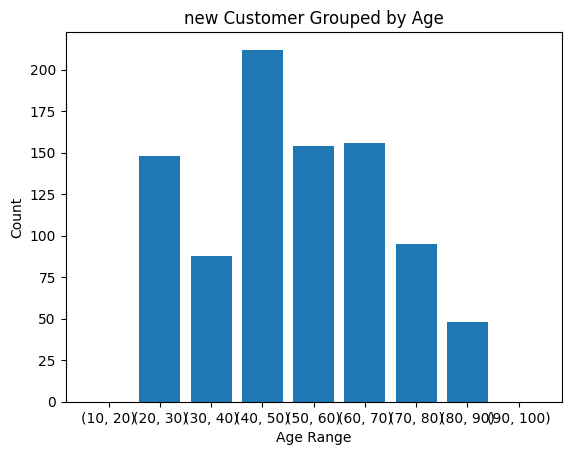

In [153]:
import matplotlib.pyplot as plt
# Create age bins
age_bins = pd.interval_range(start=10, end=100, freq=10, closed='neither')

# Group the dataframe by age bins and count the number of people in each bin
age_counts = pd.cut(NewCustomerList['Age'], bins=age_bins).value_counts(sort=False)

# Create a bar chart of the age counts
plt.bar(age_counts.index.astype(str), age_counts.values)
plt.title('new Customer Grouped by Age')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

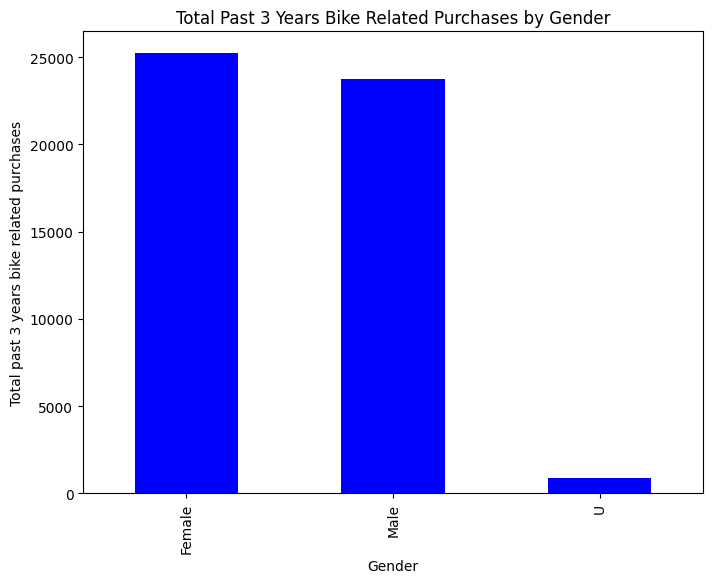

In [154]:
# Count the number of bike-related purchases for each gender
purchase_counts = NewCustomerList.groupby('gender')['past_3_years_bike_related_purchases'].sum()

# Create a bar plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
purchase_counts.plot(kind='bar', ax=ax, color='blue')

# Set axis labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Total past 3 years bike related purchases')
ax.set_title('Total Past 3 Years Bike Related Purchases by Gender')

# Show plot
plt.show()



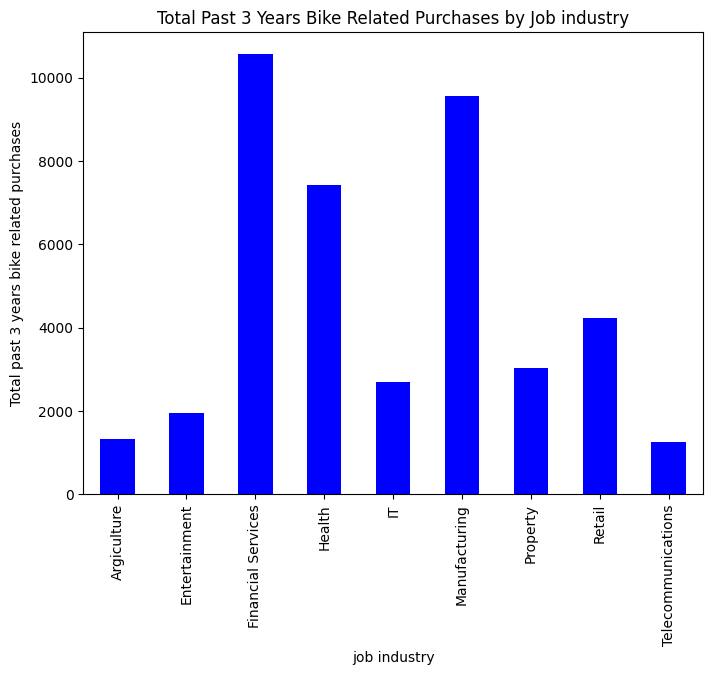

In [158]:
# Count the number of bike-related purchases for each job industry
purchase_counts = NewCustomerList.groupby('job_industry_category')['past_3_years_bike_related_purchases'].sum()

# Create a bar plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
purchase_counts.plot(kind='bar', ax=ax, color='blue')

# Set axis labels and title
ax.set_xlabel('job industry')
ax.set_ylabel('Total past 3 years bike related purchases')
ax.set_title('Total Past 3 Years Bike Related Purchases by Job industry')

# Show plot
plt.show()

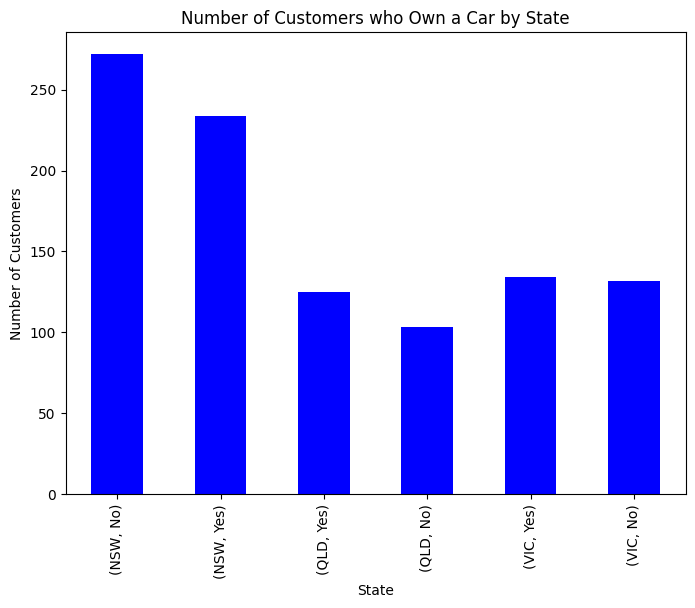

In [161]:
## Count the number of customers who own a car for each state
car_counts = NewCustomerList.groupby('state')['owns_car'].value_counts()

# Create a bar plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
car_counts.plot(kind='bar', ax=ax, color='blue')

# Set axis labels and title
ax.set_xlabel('State')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers who Own a Car by State')

# Show plot
plt.show()
